In [1]:
%matplotlib inline
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib
from bokeh.io import show, output_file
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, TapTool, BoxSelectTool, WheelZoomTool, ColumnDataSource, LabelSet
from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes
from bokeh.palettes import Spectral4


D:\Anaconda2\lib\site-packages\gensim-3.3.0-py2.7-win-amd64.egg\gensim\utils.py:1167: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [4]:
path_models = 'C:\\Users\\dell\\Desktop\\Castes\\processed\\word2vec_models'

In [5]:
wvm = Word2Vec.load(path_models+'\\'+'IN-indianexpress-india_with_phraser').wv

In [6]:
vocab = wvm.vocab
all_words = [x for x in vocab.keys()]

In [7]:
cwords = ['dalits', 'minority']
neutral_words = ['computer', 'rain']#, 'cooking', 'political', 'horoscope', 'america']

In [8]:
def add_to_graph(word, assoclist, graph):
    graph.add_node(word)
    for wtuple in assoclist:
        kword, kweight = wtuple
        graph.add_node(kword)
        graph.add_edge(word, kword, weight=kweight)
        
def recurse_add_(word, wvmodel, graph, depth=1, topn=5):
    if depth==1:
        # call add_to_graph and return
        alist = wvmodel.most_similar(word, topn=topn)
        add_to_graph(word, alist, graph)
        return
    else:
        # generate wordlist, then call recurse_add_ with each word in wordlist, with depth-1
        alist = wvmodel.most_similar(word, topn=topn)
        for wtuple in alist:
            aword, _ = wtuple
            recurse_add_(aword, wvmodel, graph, depth=depth-1, topn=topn)

In [9]:
g1 = nx.Graph()
for word in cwords+neutral_words:
    if word in all_words:
        recurse_add_(word, wvm, g1, depth=2, topn=6)
    else:
        print ("Word "+word+" not found.")

In [10]:
matplotlib.rcParams['figure.figsize'] = (17, 12)

In [13]:
plot = Plot(plot_width=1800, plot_height=1000, x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))
plot.title.text = "Graph Interaction Demonstration"

plot.add_tools(HoverTool(tooltips=[("word", "@word")]), TapTool(), BoxSelectTool(), WheelZoomTool())

graph_renderer = from_networkx(g1,nx.spring_layout, scale=1, center=(0,0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])
graph_renderer.node_renderer.data_source.data['word'] = list(g1.nodes())

graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=5)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

graph_renderer.selection_policy = NodesAndLinkedEdges()

pos = graph_renderer.layout_provider.graph_layout
x,y=zip(*pos.values())
labels = LabelSet(x='x', y='y', text='words', source=ColumnDataSource({'x':x, 'y':y,'words': pos.keys()}))

plot.renderers.append(graph_renderer)
plot.renderers.append(labels)

output_file("interactive_graphs.html")
show(plot)

In [52]:
topics = [x for x in nx.connected_component_subgraphs(g1)]
print (len(topics))

3


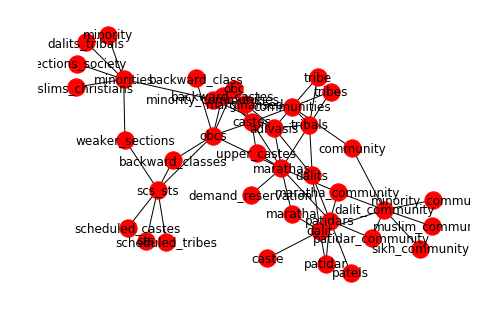

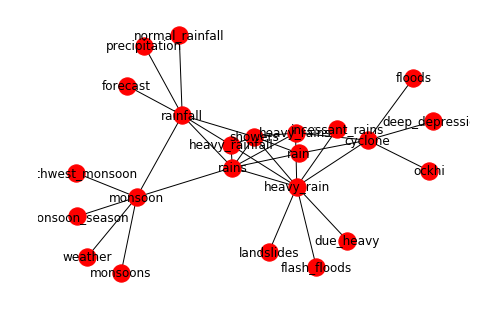

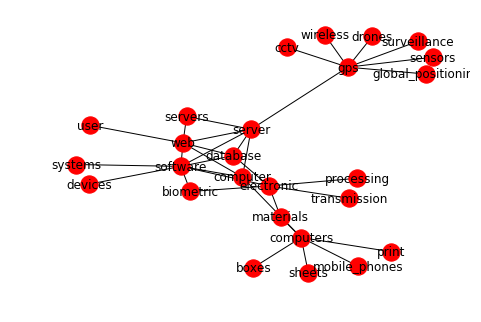

In [53]:
for gt1 in topics:
    nx.draw(gt1, with_labels=True)
    plt.show()

In [57]:
cliques4 = [x for x in nx.clique.find_cliques(g1) if len(x)==4]
nodes4 = set(n for clq in cliques4 for n in clq)
h4 = g1.subgraph(nodes4)
len(nodes4)
#nodes4 = 

11

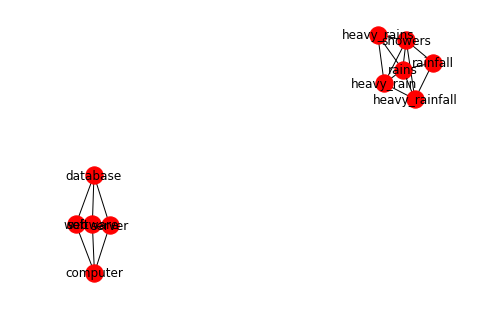

In [58]:
nx.draw(h4, with_labels=True)
plt.show()

In [59]:
cliques3 = [x for x in nx.clique.find_cliques(g1) if len(x)==3]
nodes3 = set(n for clq in cliques3 for n in clq)
h3 = g1.subgraph(nodes3)
len(nodes3)

34

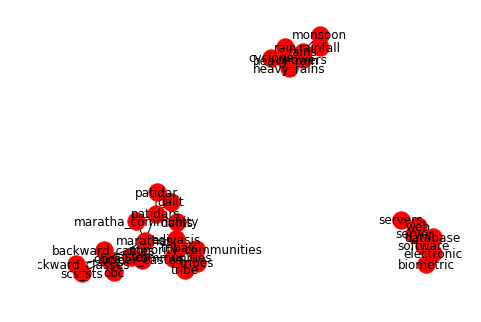

In [61]:
nx.draw(h3, with_labels=True)
plt.show()